In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from PIL import Image 
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Méthode du profil

In [2]:
#fonction qui calcule le profile d'une image
#prend en entrée l'image sous forme de matrice, la longueur et la largeur de l'image
def image_to_profile(image,longueur,largeur):
    image = Image.fromarray(image)

    # Redimensionner l'image
    image = image.resize((longueur, largeur), Image.ANTIALIAS)
    image = np.array(image)
    vecteur1 = np.full((image.shape[0], 1), None, dtype=object)
    vecteur2 = np.zeros((image.shape[0], 1))
    vecteur3 = np.zeros((image.shape[0], 1))
    vecteur4 = np.zeros((image.shape[0], 1))

    #fonction qui prend un vecteur en entrée et lui assigne la valeur c pour chaque indice si la valeur actuelle est null
    def set_vecteur(vecteur, indices,c):
        for i in indices:
            if vecteur[i]==None:
                vecteur[i]=c
        return vecteur
    c = 0

    #on applique l'algorithm du profiling 
    for r in range(image.shape[0]):
        indices1=[ i for i, valeur in enumerate(image[r,:]) if valeur > 0]
        indices2=[ i for i, valeur in enumerate(image[image.shape[0]-1-r,:]) if valeur > 0]
        indices3=[ i for i, valeur in enumerate(image[:,r]) if valeur > 0]
        indices4=[ i for i, valeur in enumerate(image[:,image.shape[0]-1-r]) if valeur > 0]
        
        set_vecteur(vecteur1,indices1,c)
        set_vecteur(vecteur2,indices2,c)
        set_vecteur(vecteur3,indices3,c)
        set_vecteur(vecteur4,indices4,c)
        c+=1
    #On assigne la moitié de la longueur pour chaque valeur nulle
    vecteur1 = np.where(vecteur1 == None, int(image.shape[0]/2), vecteur1)
    vecteur2 = np.where(vecteur2 == None, int(image.shape[0]/2), vecteur2)
    vecteur3 = np.where(vecteur3 == None, int(image.shape[0]/2), vecteur3)
    vecteur4 = np.where(vecteur4 == None, int(image.shape[0]/2), vecteur4)               
    return np.concatenate((vecteur1, vecteur2, vecteur3, vecteur4))

In [3]:
#fonction qui prend en entré le dataframe 
#prend en paramètre un data frame contenant les images plates, ainsi que la taille de l'image que l'on souhaite avoir
#pour la liste liste_image
#retourne 3 listes : 
#liste_image : une liste qui contient toutes les images mise en deux dimensions
#liste_sortie : une liste qui contient tout les chiffres de chaque image dans l'ordre
#liste profile : une liste qui contient les vecteurs profiles de chaque image dans l'ordre

def image_plate_to_image_carre_and_profile(df,longueur,largeur):
    liste_image = []
    liste_sortie = []
    liste_profile = []
    def vecteur_vers_matrice(vecteur):
       #recuperere l'image applatit et on l'a met au carré
       image = np.array(vecteur.iloc[1:],dtype=np.uint8).reshape(int(sqrt(len(vecteur)-1)), int(sqrt(len(vecteur)-1)))
       #on redimensionne l'image aux dimmensions longueur et largeur indiquées en paramètre
       image = Image.fromarray(image).resize((longueur, largeur), Image.ANTIALIAS)
       image = np.array(image)
       liste_profile.append(image_to_profile(image,longueur,largeur))

       liste_image.append(image)
       liste_sortie.append(vecteur.iloc[0])
    df.apply(vecteur_vers_matrice,axis=1)
    return liste_image,liste_sortie, liste_profile 

In [4]:
#fonction qui prend en entré le dataframe 
#retourne une liste où chaque élément est un array de la forme [chiffre,matrice_image]
'''
def image_plate_to_image_carre2(vecteur):
    liste_image = []
    liste_sortie = []
    liste_profile = []
    def vecteur_vers_matrice(vecteur):
       image = np.array(vecteur[1:],dtype=np.uint8).reshape(int(sqrt(len(vecteur)-1)), int(sqrt(len(vecteur)-1)))
       liste_profile.append(image_to_profile(image))
       liste_image.append(image)
       liste_sortie.append(vecteur[0])
    vecteur_vers_matrice(vecteur)
    return liste_image,liste_sortie, liste_profile 
'''

'\ndef image_plate_to_image_carre2(vecteur):\n    liste_image = []\n    liste_sortie = []\n    liste_profile = []\n    def vecteur_vers_matrice(vecteur):\n       image = np.array(vecteur[1:],dtype=np.uint8).reshape(int(sqrt(len(vecteur)-1)), int(sqrt(len(vecteur)-1)))\n       liste_profile.append(image_to_profile(image))\n       liste_image.append(image)\n       liste_sortie.append(vecteur[0])\n    vecteur_vers_matrice(vecteur)\n    return liste_image,liste_sortie, liste_profile \n'

In [5]:
df = pd.read_csv('mnist_train.csv',header=None)


In [6]:
'''
tab=df.to_numpy()
resultat = np.apply_along_axis(image_plate_to_image_carre2,axis=1,arr=tab,longueur=10, largeur=10)
'''

'\ntab=df.to_numpy()\nresultat = np.apply_along_axis(image_plate_to_image_carre2,axis=1,arr=tab,longueur=10, largeur=10)\n'

In [11]:
#méthode 1
liste_train_image,liste_train_sortie, liste_profile= image_plate_to_image_carre_and_profile(df,28,28)


C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\3840149718.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = Image.fromarray(image).resize((longueur, largeur), Image.ANTIALIAS)
C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\2231622570.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((longueur, largeur), Image.ANTIALIAS)


KeyboardInterrupt: 

In [12]:
liste_train_image10,liste_train_sortie10, liste_profile10= image_plate_to_image_carre_and_profile(df,10,10)


C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\3840149718.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = Image.fromarray(image).resize((longueur, largeur), Image.ANTIALIAS)
C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\2231622570.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((longueur, largeur), Image.ANTIALIAS)


In [13]:
liste_train_image20,liste_train_sortie20, liste_profile20= image_plate_to_image_carre_and_profile(df,20,20)

C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\3840149718.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = Image.fromarray(image).resize((longueur, largeur), Image.ANTIALIAS)
C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\2231622570.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((longueur, largeur), Image.ANTIALIAS)


In [10]:
liste_train_image30,liste_train_sortie30, liste_profile30= image_plate_to_image_carre_and_profile(df,30,30)

C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\3840149718.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = Image.fromarray(image).resize((longueur, largeur), Image.ANTIALIAS)
C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\2231622570.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((longueur, largeur), Image.ANTIALIAS)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\rayan\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\2191578102.py", line 1, in <module>
    liste_train_image30,liste_train_sortie30, liste_profile30= image_plate_to_image_carre_and_profile(df,30,30)
                                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rayan\AppData\Local\Temp\ipykernel_21708\3840149718.py", line 23, in image_plate_to_image_carre_and_profile
    df.apply(vecteur_vers_matrice,axis=1)
  File "c:\Users\rayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\frame.py", line 9423, in apply
    return op.apply().__finalize__(self, method="apply")
           ^^^^^^^^^^
  File "c:\Users\rayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\ap

In [ ]:
#liste_train_image40,liste_train_sortie40, liste_profile40= image_plate_to_image_carre_and_profile(df,40,40)

In [ ]:
#liste_train_image50,liste_train_sortie50, liste_profile50= image_plate_to_image_carre_and_profile(df,50,50)

In [ ]:
#liste_train_image60,liste_train_sortie60, liste_profile60= image_plate_to_image_carre_and_profile(df,60,60)

In [ ]:
#liste_train_image80,liste_train_sortie80, liste_profile80= image_plate_to_image_carre_and_profile(df,80,80)

In [ ]:
#liste_train_image100,liste_train_sortie100, liste_profile100= image_plate_to_image_carre_and_profile(df,100,100)

In [ ]:
#Fonction qui permet de calculer le taux de chevauchement
#prend en paramètre les vecteurs de profil, la sortie ainsi que le modèle de NearestNeighbors entrainé avec les vecteurs de profil
def taux_chevauchement(vecteurs_profil,vecteur_y,neighbors):
    distances, indices = neighbors.kneighbors(vecteurs_profil)
    c=0
    i=0
    indices = indices[:,1]
    for i in range(len(vecteur_y)):
        if vecteur_y[indices[i]] !=  vecteur_y[i]:
            c+=1
        i+=1
    return (c/len(vecteur_y))

In [ ]:
liste_profile30[10].shape

(120, 1)

In [ ]:
#on stock la liste dans un array afin de lui donner 2 dimmension au lieu de 3 
# cela est necessaire pour le passer dans l'algorithmique NearestNeighbors
liste_profile30 = np.array(liste_profile30) 
liste_profile30 = liste_profile30.reshape((len(liste_profile30), liste_profile30.shape[1]*liste_profile30.shape[2]))

In [ ]:
#on calcule les voisins les plus proches puis le taux de chevauchement
neighbors = NearestNeighbors(n_neighbors=2).fit(liste_profile30)

tx_chevauchement= taux_chevauchement(liste_profile30,liste_train_sortie30,neighbors)
tx_chevauchement

0.2573166666666667

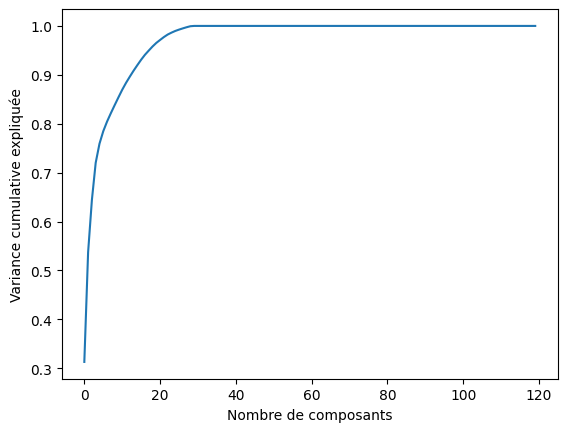

In [ ]:
pca = PCA()

# On applique le modèle PCA sur nos données
pca.fit(liste_profile30)  

# On trace la somme cumulative de la variance expliquée
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance_ratio_cumulative)
plt.xlabel('Nombre de composants')
plt.ylabel('Variance cumulative expliquée')
plt.show()

On remarque que le nombre de composantes principales optimal est 30

In [ ]:
pca =pca.set_params(n_components=30)
liste_profile30_reduit = pca.fit_transform(liste_profile30)

In [ ]:
liste_profile30_reduit.shape

(60000, 30)

### Données de test 

In [ ]:
#On charge les données de test
df_test = pd.read_csv('mnist_test.csv',header=None)

In [ ]:
#On crée la liste des images au carrées, la liste des sorties ainsi que la liste contenant les profiles de chaque vecteur
# la dimension de l'image etait de 30 par 30 ainsi on redimensionne les images dans ces dimensions
liste_test_image30,liste_test_sortie30, liste_profile_test30= image_plate_to_image_carre_and_profile(df_test,30,30)

C:\Users\rayan\AppData\Local\Temp\ipykernel_27192\3840149718.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = Image.fromarray(image).resize((longueur, largeur), Image.ANTIALIAS)
C:\Users\rayan\AppData\Local\Temp\ipykernel_27192\2231622570.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((longueur, largeur), Image.ANTIALIAS)


In [ ]:
#on stock la liste dans un array afin de lui donner 2 dimmension au lieu de 3 
# cela est necessaire pour le passer dans l'algorithmique NearestNeighbors
liste_profile_test30 = np.array(liste_profile_test30) 
liste_profile_test30 = liste_profile_test30.reshape((len(liste_profile_test30), liste_profile_test30.shape[1]*liste_profile_test30.shape[2]))

In [ ]:
# On utilise la PCA deja entrainé sur les données d'entrainement afin de réduire les données de test 
liste_profile_test30_reduit = pca.transform(liste_profile_test30) 

In [ ]:
liste_profile_test30_reduit.shape

(10000, 30)

# Autoencoder

In [2]:
#import 
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape, Flatten, Dense, Lambda, Input
from tensorflow.keras.losses import MeanSquaredError



In [3]:
def from_vecteur_to_image(vecteur):
    return np.array(vecteur.iloc[1:],dtype=np.uint8).reshape(int(sqrt(len(vecteur)-1)), int(sqrt(len(vecteur)-1)))

In [4]:
train = pd.read_csv('mnist_train.csv')

train_image=np.stack(train.apply(from_vecteur_to_image,axis=1))


### Autoencoder Simple

In [34]:
latent_dim = 64 #dimension de notre vecteur encodée (couche caché la plus interne)

class AutoencoderSimple(Model):
  def __init__(self, latent_dim=64):
    super(AutoencoderSimple, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([Flatten(),Lambda(lambda x : x/255),Dense(latent_dim, activation='relu')])
    self.decoder= tf.keras.Sequential([Dense(784,activation='relu'),Reshape((28,28))])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AutoencoderSimple()

In [35]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = autoencoder.fit(train_image,train_image,epochs=10,validation_data=(test_image,test_image))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3547.3450 - accuracy: 0.2782 - val_loss: 2424.3396 - val_accuracy: 0.4008
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1998.9236 - accuracy: 0.4451 - val_loss: 1649.0712 - val_accuracy: 0.4741
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1494.8031 - accuracy: 0.4934 - val_loss: 1337.1339 - val_accuracy: 0.5048
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1269.2856 - accuracy: 0.5173 - val_loss: 1179.5039 - val_accuracy: 0.5208
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1145.1461 - accuracy: 0.5305 - val_loss: 1087.6183 - val_accuracy: 0.5315
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1068.4120 - accuracy: 0.5387 - val_loss: 1027.6589 - val_accuracy: 0.5364
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1015.7733 - accuracy: 0.

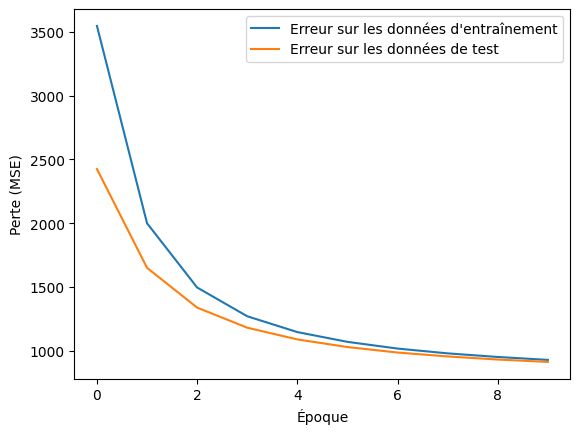

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

#Tracez l'évolution des erreurs d'entraînement et de validation au fil des époques
plt.plot(loss, label='Erreur sur les données d\'entraînement')
plt.plot(val_loss, label='Erreur sur les données de test')
plt.xlabel('Époque')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.show()

In [8]:
Image.fromarray(train_image[0])

In [17]:
train_image[0].dtype

dtype('uint8')

In [30]:
sortie = autoencoder.call(train_image[0].reshape(1,28,28))


In [31]:
sortie_np=sortie[0].numpy()
sortie_np.shape

(28, 28)

In [32]:
sortie_np =sortie_np.astype('uint8')

In [33]:
Image.fromarray(sortie_np)

### Autoencoder Profond

In [38]:
latent_dim = 64 #dimension de notre vecteur encodée (couche caché la plus interne)

class AutoencoderProfond(Model):
  def __init__(self, latent_dim=64,nbre_neuronne_couche2=500):
    super(AutoencoderProfond, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([Flatten(),Lambda(lambda x : x/255),
                                        Dense(nbre_neuronne_couche2, activation='relu'),
                                        Dense(latent_dim, activation='relu')])
    self.decoder= tf.keras.Sequential([Dense(nbre_neuronne_couche2, activation='relu'),Dense(784,activation='relu'),Reshape((28,28))])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded) 
    return decoded

autoencoder = AutoencoderProfond()

In [49]:
liste_nbre_neuronne_couche2 = [10,20,50,100,200,500]
liste_error =[]
def evaluation_modele_couche_taille_differente():
    for n in liste_nbre_neuronne_couche2:
        autoencoder_profond=AutoencoderProfond(nbre_neuronne_couche2=n)
        autoencoder_profond.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
        history = autoencoder_profond.fit(train_image,train_image,epochs=10)
        liste_error.append(history.history['loss'][-1:])
    return liste_error



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4503.9150 - accuracy: 0.1814 - val_loss: 4129.5498 - val_accuracy: 0.2022
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3508.6433 - accuracy: 0.3099 - val_loss: 3225.2498 - val_accuracy: 0.3587
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 3063.8564 - accuracy: 0.3842 - val_loss: 2930.8867 - val_accuracy: 0.4028
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2915.5623 - accuracy: 0.4037 - val_loss: 2883.7070 - val_accuracy: 0.4061
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2862.4319 - accuracy: 0.4099 - val_loss: 2782.2234 - val_accuracy: 0.4128
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2694.0327 - accuracy: 0.4221 - val_loss: 2637.6562 - val_accuracy: 0.4245
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2638.6816 - accuracy: 0.

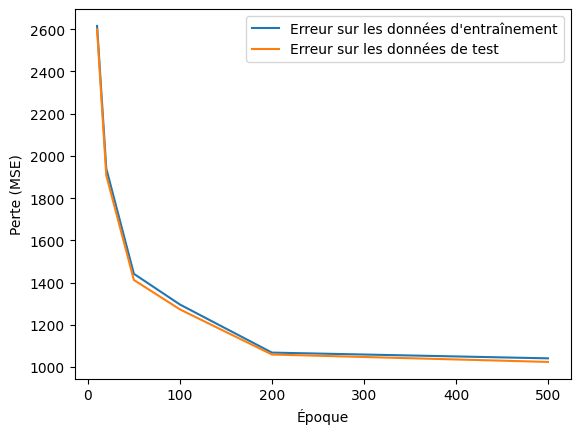

In [52]:
liste_nbre_neuronne_couche2 = [10,20,50,100,200,500]
#Tracez l'évolution des erreurs d'entraînement et de validation au fil des époques
plt.plot(liste_nbre_neuronne_couche2,liste_error, label='Erreur sur les données d\'entraînement')
plt.xlabel('Nombre de neuronne')
plt.ylabel('Perte (MSE)')
plt.legend()
plt.show()

In [53]:
history.history['loss'][-1:]

[[2615.88232421875],
 [1940.6546630859375],
 [1441.46630859375],
 [1296.0911865234375],
 [1068.2410888671875],
 [1041.067626953125]]